Tarea 4 - Modelamiento

Cargo: Ciencia de Datos: Luisa Velez 

In [155]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [156]:
import pandas as pd

# Lista de variables que quieres conservar
variables_a_conservar = [
'cole_area_ubicacion',
'cole_bilingue',
'cole_caracter',
'cole_cod_mcpio_ubicacion',
'cole_genero',
'cole_jornada',
'cole_naturaleza',
'cole_sede_principal',
'estu_genero',
'estu_fechanacimiento',
'estu_cod_reside_mcpio',
'desemp_ingles',
'fami_cuartoshogar',
'fami_educacionmadre',
'fami_educacionpadre',
'fami_estratovivienda',
'fami_personashogar',
'fami_tieneautomovil',
'fami_tienecomputador',
'fami_tieneinternet',
'fami_tienelavadora',
'punt_global'
]

datos = pd.read_csv("datos_limpios.csv")
datos = datos[variables_a_conservar]

# Reemplaza los valores en la columna "fami_cuartoshogar" usando el diccionario de mapeo
mapeo_valores = {"Uno": 1, "Dos": 2, "Tres": 3, "Cuatro": 4, "Cinco": 5, "Seis": 6, "Siete":7, "Ocho": 8, "Nueve": 9,"Diez": 10, "Seis o mas":7, "Diez o más":10, "9 o más":9,"No Aplica":-2}
datos["fami_cuartoshogar"] = datos["fami_cuartoshogar"].replace(mapeo_valores)


# Reemplaza los valores en la columna "fami_estratovivienda" usando el diccionario de mapeo
mapeo_valores_estrato = {"Estrato 1": 1, "Estrato 2": 2, "Estrato 3": 3, "Estrato 4": 4, "Estrato 5": 5, "Estrato 6": 6, "Sin Estrato":0}
datos["fami_estratovivienda"] = datos["fami_estratovivienda"].replace(mapeo_valores_estrato)

# Variables booleanas (SI y NO)
mapeo_valores_booleanos = {"Si": 1, "No": 0, "N":0, "S":1,"No Aplica":-2}
variables_a_modificar = ["fami_tieneautomovil", "fami_tienecomputador", "fami_tieneinternet", "fami_tienelavadora",'cole_bilingue','cole_sede_principal']
for variable in variables_a_modificar:
    datos[variable] = datos[variable].replace(mapeo_valores_booleanos)

# Personas Hogar
mapeo_personas_hogar = {"Uno": 1, "Una":1, "Dos": 2, "Tres": 3, "Cuatro": 4, "Cinco": 5, "Seis": 6, "Siete": 7, "Ocho": 8, "Nueve": 9, "Diez": 10, "Once": 11, "Doce o más": 12,"3 a 4":3.5, 
                        "1 a 2":2.5, "2 a 3":2.5, "4 a 5":4.5, "5 a 6":5.5, "6 a 7":6.5,"7 a 8":7.5, "8 a 9":8.5, "9 a 10":9.5, "10 a 11":10.5, "11 a 12":11.5, "Diez o más":10, "9 o más":9, "No Aplica":-2}
datos["fami_personashogar"] = datos["fami_personashogar"].replace(mapeo_personas_hogar)

# Genero Estudiante
mapeo_genero = {"F": 1, "M": 0, "No Aplica":-2}
datos["estu_genero"] = datos["estu_genero"].replace(mapeo_genero)

#Cambio variable a numerica
datos["estu_cod_reside_mcpio"] = datos["estu_cod_reside_mcpio"].astype(int)
datos['cole_cod_mcpio_ubicacion'] = datos['cole_cod_mcpio_ubicacion'].astype(int)

# Extraer el año de la variable estu_fechanacimiento
datos['estu_fechanacimiento'] = datos['estu_fechanacimiento'].str.split('/').str[-1].astype(int)

# Area Colgios
mapeo_area = {"RURAL": 1, "URBANO": 0, "NO APLICA":-1, "No Aplica":-2}
datos['cole_area_ubicacion'] = datos['cole_area_ubicacion'].replace(mapeo_area)

# Desempeño Ingles
mapeo_ingles = {"A-": 0, "A+": 1, "A1": 2, "A2": 3, "B-": 4, "B+": 5, "B1": 6, "B2": 7, "No aplica":-1, "No Aplica":-2}
datos['desemp_ingles'] = datos['desemp_ingles'].replace(mapeo_ingles)

# Caracter Colegio
mapeo_caracter = {"TÉCNICO/ACADÉMICO": 1, "ACADÉMICO": 0,"TÉCNICO": 2, "NO APLICA":-1, "No Aplica":-2 }
datos['cole_caracter'] = datos['cole_caracter'].replace(mapeo_caracter)

# Genero Colegio
mapeo_GENCOL = {"MIXTO": 0, "FEMENINO": 1, "MASCULINO":2, "NO APLICA":-1, "No Aplica":-2}
datos['cole_genero'] = datos['cole_genero'].replace(mapeo_GENCOL)

# Jornada Colegio
mapeo_jor = {"NOCHE": 0, "MAÑANA": 1, "COMPLETA":2, "SABATINA":3, "TARDE":4, "UNICA":5, "NO APLICA":-1, "No Aplica":-2}
datos['cole_jornada'] = datos['cole_jornada'].replace(mapeo_jor)

# naturaleza Colegio
mapeo_na = {"OFICIAL": 0, "NO OFICIAL": 1, "UNICA":2, "NO APLICA":-1, "No Aplica":-2}
datos['cole_naturaleza'] = datos['cole_naturaleza'].replace(mapeo_na)


# Convertir las columnas seleccionadas a tipo numérico
datos['punt_global'] = datos['punt_global'].apply(pd.to_numeric, errors='coerce')

# Educacion Papas
mapeo_edu = {"Secundaria (Bachillerato) completa": 0, "Secundaria (Bachillerato) incompleta": 1,"Primaria completa": 2, "Primaria incompleta": 3,"Técnica o tecnológica completa": 4,
            "Técnica o tecnológica incompleta": 5, "Educación profesional completa": 6, "Educación profesional incompleta": 7, "Postgrado":8, "No sabe":-1, "Ninguno":-2, "No aplica": -3, "No Aplica": -3}
datos['fami_educacionmadre'] = datos['fami_educacionmadre'].replace(mapeo_edu)
datos['fami_educacionpadre'] = datos['fami_educacionpadre'].replace(mapeo_edu)

datos


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2524\2323031435.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["fami_cuartoshogar"] = datos["fami_cuartoshogar"].replace(mapeo_valores)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2524\2323031435.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["fami_estratovivienda"] = datos["fami_estratovivienda"].replace(mapeo_valores_estrato)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2524\2323031435.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated and w

,cole_area_ubicacion,cole_bilingue,cole_caracter,cole_cod_mcpio_ubicacion,cole_genero,cole_jornada,cole_naturaleza,cole_sede_principal,estu_genero,estu_fechanacimiento,...,fami_cuartoshogar,fami_educacionmadre,fami_educacionpadre,fami_estratovivienda,fami_personashogar,fami_tieneautomovil,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,punt_global
0,0,0,1,5266,0,1,0,1,1,1998,...,1,0,0,2,3.0,0,1,1,0,284.0
1,0,0,0,5001,0,1,1,1,1,1997,...,2,2,3,3,5.0,0,0,1,1,214.0
2,0,0,1,5361,0,2,0,1,0,2001,...,2,4,2,2,3.5,0,1,1,0,325.0
3,1,0,0,5631,0,1,0,1,0,1999,...,3,0,1,2,5.0,0,0,1,1,304.0
4,0,0,0,5631,0,1,0,1,1,2001,...,3,0,0,2,3.5,0,1,1,1,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315550,0,0,1,5001,0,0,0,1,0,2001,...,2,0,-3,1,3.5,0,1,0,1,228.0
315551,1,0,1,5837,0,1,0,1,0,2000,...,4,3,3,1,3.5,0,0,0,0,175.0
315552,0,0,1,5212,0,2,0,1,1,1999,...,5,0,0,3,5.0,0,1,1,1,360.0
315553,0,0,1,5360,0,1,0,1,0,1996,...,2,2,0,1,4.0,0,1,1,0,266.0


Generamos nuestros vectores X & Y

In [157]:
X = datos.iloc[:,1:21]
y = datos['punt_global']

In [145]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
6312/6312 [==============================] - 25s 4ms/step - loss: 1897.5050 - val_loss: 1209.7670
Epoch 2/200
6312/6312 [==============================] - 33s 5ms/step - loss: 1110.1633 - val_loss: 1114.1948
Epoch 3/200
6312/6312 [==============================] - 30s 5ms/step - loss: 1084.4569 - val_loss: 1086.7373
Epoch 4/200
6312/6312 [==============================] - 29s 5ms/step - loss: 1071.2513 - val_loss: 1098.2125
Epoch 5/200
6312/6312 [==============================] - 49s 8ms/step - loss: 1062.5001 - val_loss: 1080.4565
Epoch 6/200
6312/6312 [==============================] - 26s 4ms/step - loss: 1056.0992 - val_loss: 1060.3749
Epoch 7/200
6312/6312 [==============================] - 29s 5ms/step - loss: 1048.4895 - val_loss: 1054.7534
Epoch 8/200
6312/6312 [==============================] - 29s 5ms/step - loss: 1036.8857 - val_loss: 1027.9591
Epoch 9/200
6312/6312 [==============================] - 32s 5ms/step - loss: 1027.2966 - val_loss: 1027.5055
Epoch 10/2

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

1973/1973 [==============================] - 5s 2ms/step
Error cuadrático medio (MSE): 969.584459706192
Error absoluto medio (MAE): 24.85177007572023
Coeficiente de determinación (R^2): 0.5967596780110312


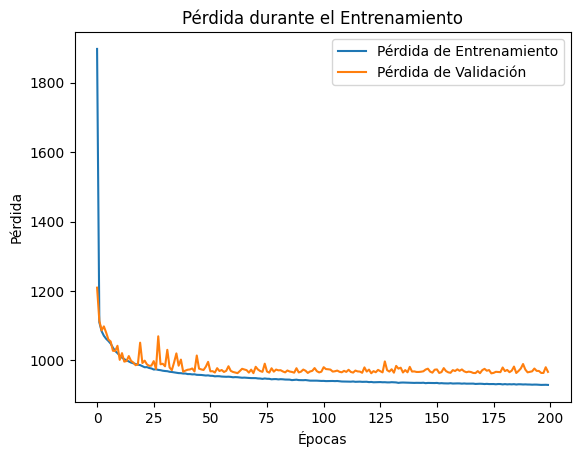

In [151]:
# Visualización de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

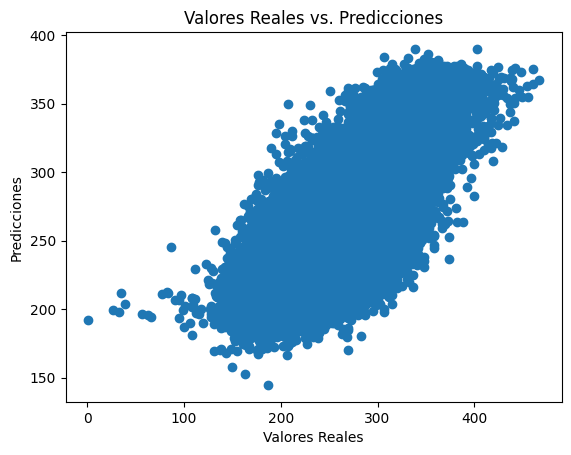

In [152]:
# Visualización de predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal
mlp = MLPRegressor(hidden_layer_sizes=(64,32), max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = mlp.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 965.6647501478936
Error absoluto medio (MAE): 24.796800279207222
Coeficiente de determinación (R^2): 0.5983898453766163


In [162]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y hacer predicciones en el conjunto de prueba
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)
print("Mejores hiperparámetros:", grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de red neuronal con Dropout y regularización L2
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(1)  # Capa de salida con una neurona para regresión
])

# Compilar el modelo con una tasa de aprendizaje ajustada
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo con EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled).flatten()
